<a href="https://colab.research.google.com/github/BasilaThasni/ML_Assignments/blob/main/FormativeAssessment_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving house_price.csv to house_price.csv


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


##1.EDA

In [ ]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [ ]:
df.shape

(13200, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [ ]:
df.duplicated().sum()

1049

In [ ]:
duplicate = df[df.duplicated()]
duplicate


,location,size,total_sqft,bath,price,bhk,price_per_sqft
239,Chandapura,1 BHK,645.0,1.0,16.45,1,2550
735,other,2 BHK,1100.0,2.0,48.00,2,4363
874,Chandapura,2 BHK,1015.0,2.0,25.88,2,2549
882,Whitefield,2 BHK,1116.0,2.0,51.91,2,4651
892,Kanakpura Road,1 BHK,525.0,1.0,26.00,1,4952
...,...,...,...,...,...,...,...
13179,Whitefield,4 BHK,2856.0,5.0,154.50,4,5409
13186,other,4 Bedroom,1200.0,5.0,325.00,4,27083
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.00,7,16666
13193,Uttarahalli,3 BHK,1345.0,2.0,57.00,3,4237


In [ ]:
df.drop_duplicates(inplace=True)
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [ ]:
for column in df.select_dtypes(include="object").columns:
    print(f"{column}: {df[column].unique()}\n")

location: ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli'
 'Lingadheeranahalli' 'Kothanur' 'Whitefield' 'Old Airport Road'
 'Rajaji Nagar' 'Marathahalli' 'other' '7th Phase JP Nagar' 'Gottigere'
 'Sarjapur' 'Mysore Road' 'Bisuvanahalli' 'Raja Rajeshwari Nagar'
 'Kengeri' 'Binny Pete' 'Thanisandra' 'Bellandur' 'Electronic City'
 'Ramagondanahalli' 'Yelahanka' 'Hebbal' 'Kasturi Nagar' 'Kanakpura Road'
 'Electronics City Phase 1' 'Kundalahalli' 'Chikkalasandra'
 'Murugeshpalya' 'Sarjapur  Road' 'HSR Layout' 'Doddathoguru' 'KR Puram'
 'Bhoganhalli' 'Lakshminarayana Pura' 'Begur Road' 'Varthur'
 'Bommanahalli' 'Gunjur' 'Devarachikkanahalli' 'Hegde Nagar'
 'Haralur Road' 'Hennur Road' 'Kothannur' 'Kalena Agrahara'
 'Kaval Byrasandra' 'ISRO Layout' 'Garudachar Palya' 'EPIP Zone'
 'Dasanapura' 'Kasavanhalli' 'Sanjay nagar' 'Domlur'
 'Sarjapura - Attibele Road' 'Yeshwanthpur' 'Chandapura' 'Nagarbhavi'
 'Devanahalli' 'Ramamurthy Nagar' 'Malleshwaram' 'Akshaya Nagar'
 'Shampura' 'Kad

In [ ]:
for column in df.select_dtypes(include="object").columns:
    print(f"{df[column].value_counts()}\n")

location
other                        2659
Whitefield                    500
Sarjapur  Road                357
Electronic City               275
Thanisandra                   224
                             ... 
Poorna Pragna Layout           10
Narayanapura                    9
2nd Phase Judicial Layout       8
Parappana Agrahara              6
Badavala Nagar                  5
Name: count, Length: 241, dtype: int64

size
2 BHK         4676
3 BHK         3918
4 Bedroom      789
4 BHK          543
3 Bedroom      509
1 BHK          495
2 Bedroom      293
5 Bedroom      282
6 Bedroom      189
1 Bedroom       95
8 Bedroom       83
7 Bedroom       81
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            12
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18

In [ ]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12151.000000,12151.000000,12151.000000,12151.000000,1.215100e+04
mean,1574.846013,2.719941,115.471328,2.827504,8.132642e+03
std,1277.328354,1.372210,154.094133,1.326540,1.112329e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.312000e+03
50%,1290.000000,2.000000,74.000000,3.000000,5.500000e+03
75%,1700.000000,3.000000,123.500000,3.000000,7.461000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


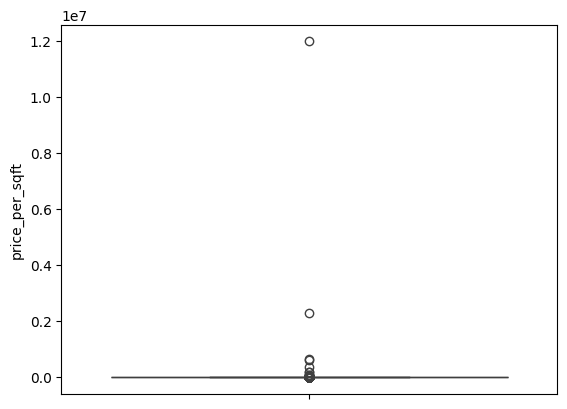

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df['price_per_sqft'])
plt.show()

#2.DETECT AND REMOVE OUTLIERS

###remove outliers using mean and standard deviation.


In [ ]:
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()
mean_df = df[(df['price_per_sqft'] > (mean - 3*std)) & (df['price_per_sqft'] < (mean + 3*std))]
mean_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


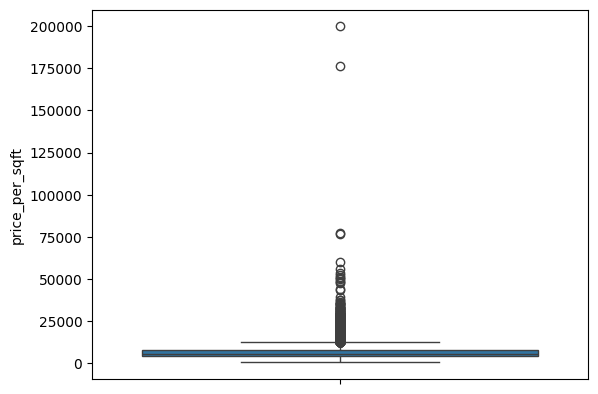

In [ ]:
sns.boxplot(mean_df['price_per_sqft'])
plt.show()

###remove outliers using percentiles


In [ ]:
lower_limit = df['price_per_sqft'].quantile(0.01)  # Gets the 1st percentile value of 'price_per_sqft'.
upper_limit = df['price_per_sqft'].quantile(0.99)  # Gets the 99th percentile value of 'price_per_sqft'.
percentiles_df = df[(df['price_per_sqft'] > lower_limit) & (df['price_per_sqft'] < upper_limit)]  # selects rows where 'price_per_sqft' is outside the 1st and 99th percentiles (outliers).
percentiles_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


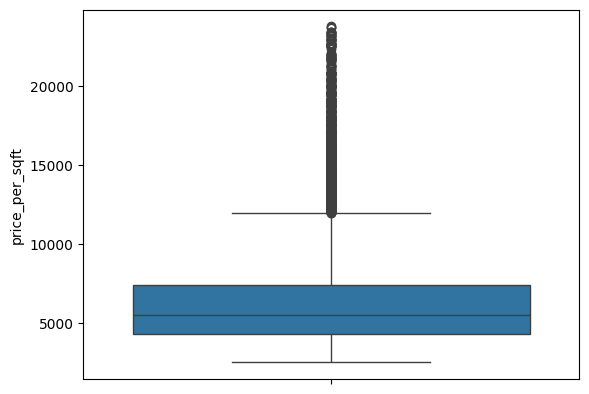

In [ ]:
sns.boxplot(percentiles_df['price_per_sqft'])
plt.show()

###remove outliers using interquartile range method(IQR)

In [ ]:
Q1 = df['price_per_sqft'].quantile(0.25) # Computes the 1st quartile (25th percentile) of 'price_per_sqft'.
Q3 = df['price_per_sqft'].quantile(0.75) # Computes the 3rd quartile (75th percentile) of 'price_per_sqft'.
IQR = Q3 - Q1  # Computes the interquartile range (IQR), which measures the middle 50% of the data.
iqr_df = df[(df['price_per_sqft'] > (Q1 - 1.5 * IQR)) & (df['price_per_sqft'] < (Q3 + 1.5 * IQR))]  # Removes rows where 'price_per_sqft' lies outside 1.5 times the IQR (outliers).
iqr_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [ ]:
print(Q1)
print(Q3)

print(IQR)

print(Q1-1.5*IQR)

4312.0
7461.0
3149.0
-411.5


In [ ]:
print(Q3 + 1.5 * IQR)

12184.5


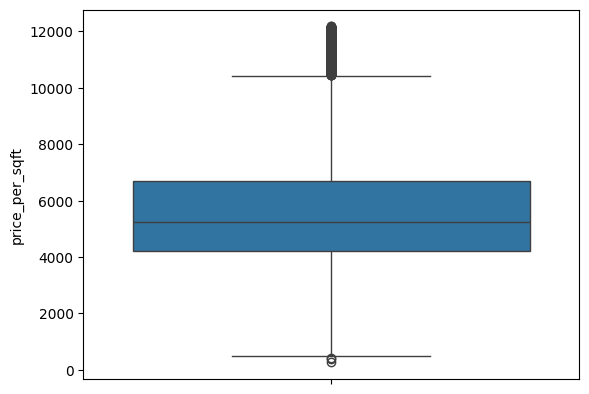

In [ ]:
sns.boxplot(iqr_df['price_per_sqft'])
plt.show()

In [ ]:
iqr_df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,11009.000000,11009.000000,11009.000000,11009.000000,11009.000000
mean,1535.555668,2.567626,90.559052,2.673994,5679.342447
std,1238.075962,1.155509,77.048031,1.090265,2044.139791
min,276.000000,1.000000,8.000000,1.000000,267.000000
25%,1100.000000,2.000000,49.000000,2.000000,4204.000000
50%,1282.000000,2.000000,68.100000,3.000000,5252.000000
75%,1655.000000,3.000000,104.000000,3.000000,6693.000000
max,52272.000000,27.000000,2100.000000,27.000000,12173.000000


###remove outliers using Z-score method

In [ ]:
from scipy import stats  #Imports the `stats` module from the SciPy library to calculate Z-scores.
df['z_score'] = stats.zscore(df['price_per_sqft'])  #Computes the Z-scores of the 'price_per_sqft' column, which measures how many standard deviations each value is from the mean.
zscore_df = df[df['z_score'].abs() < 3]  #Filters out rows where the absolute Z-score is greater than 3 (outliers).
zscore_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039861
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.031625
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.034412
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.016971
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034907
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,-0.014409
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.012979
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.026777
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.025845


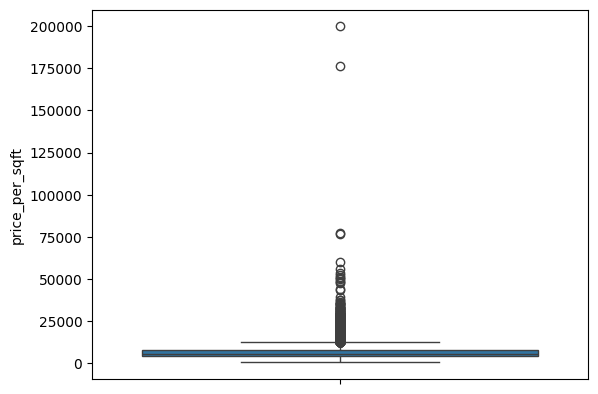

In [ ]:
sns.boxplot(zscore_df['price_per_sqft'])
plt.show()

##3.IQR method of outlier removal is suitable here.


In [ ]:
iqr_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


##**Outlier removal using IQR method is suitable.

##4.DRAW HISTPLOT

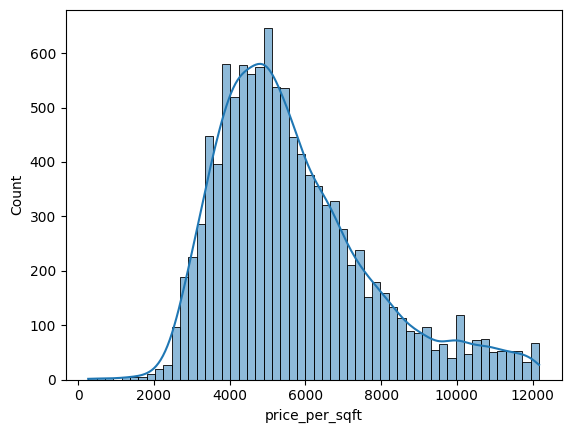

Skewness: 0.977839864547141, Kurtosis: 0.7166920949930122


In [ ]:
sns.histplot(iqr_df['price_per_sqft'], kde=True)
plt.show()

skewness = iqr_df['price_per_sqft'].skew()
kurtosis = iqr_df['price_per_sqft'].kurtosis()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")  \


<ipython-input-42-6b8222579264>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iqr_df['price_per_sqft'] = np.log(iqr_df['price_per_sqft'])  # Applies a log transformation to 'price_per_sqft' to reduce skewness.


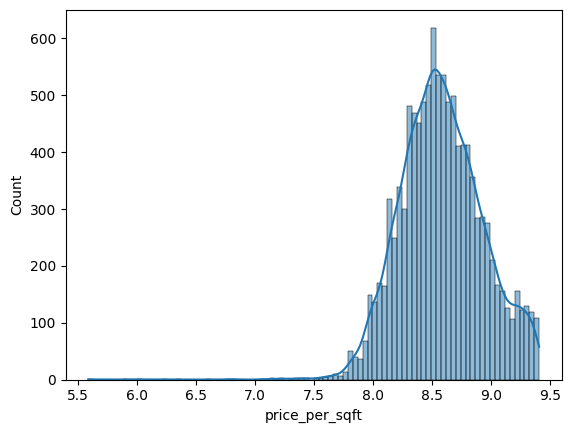

Skewness: -0.10745433189315542, Kurtosis: 1.3100307783997556


In [ ]:
import numpy as np
iqr_df['price_per_sqft'] = np.log(iqr_df['price_per_sqft'])  # Applies log transformation to 'price_per_sqft' to reduce skewness.
sns.histplot(iqr_df['price_per_sqft'], kde=True)
plt.show()

skewness = iqr_df['price_per_sqft'].skew()
kurtosis = iqr_df['price_per_sqft'].kurtosis()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")


In [49]:
iqr_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,8.215818
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,8.437067
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,8.367532
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,8.739536
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,8.354674
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,8.784162
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,8.808220
13196,other,4 BHK,3600.0,5.0,400.00,4,9.315691
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,8.567506


##5.Check the correlation between all the numerical columns and plot heatmap.  

In [63]:
corr_matrix=iqr_df.select_dtypes(include="number").corr()
corr_matrix

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.442982,0.656957,0.414154,0.052814
bath,0.442982,1.000000,0.558839,0.883993,0.323668
price,0.656957,0.558839,1.000000,0.488424,0.572143
bhk,0.414154,0.883993,0.488424,1.000000,0.276282
price_per_sqft,0.052814,0.323668,0.572143,0.276282,1.000000


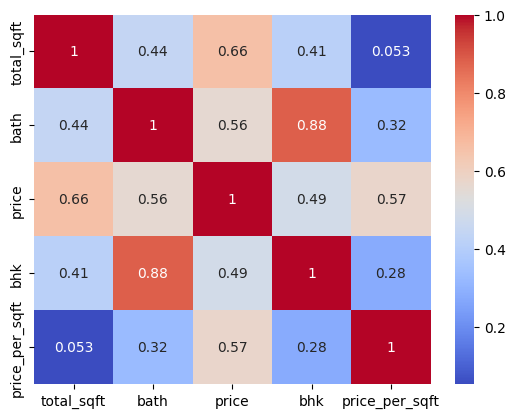

In [70]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

##6.Draw Scatter plot between the variables to check the correlation between them.

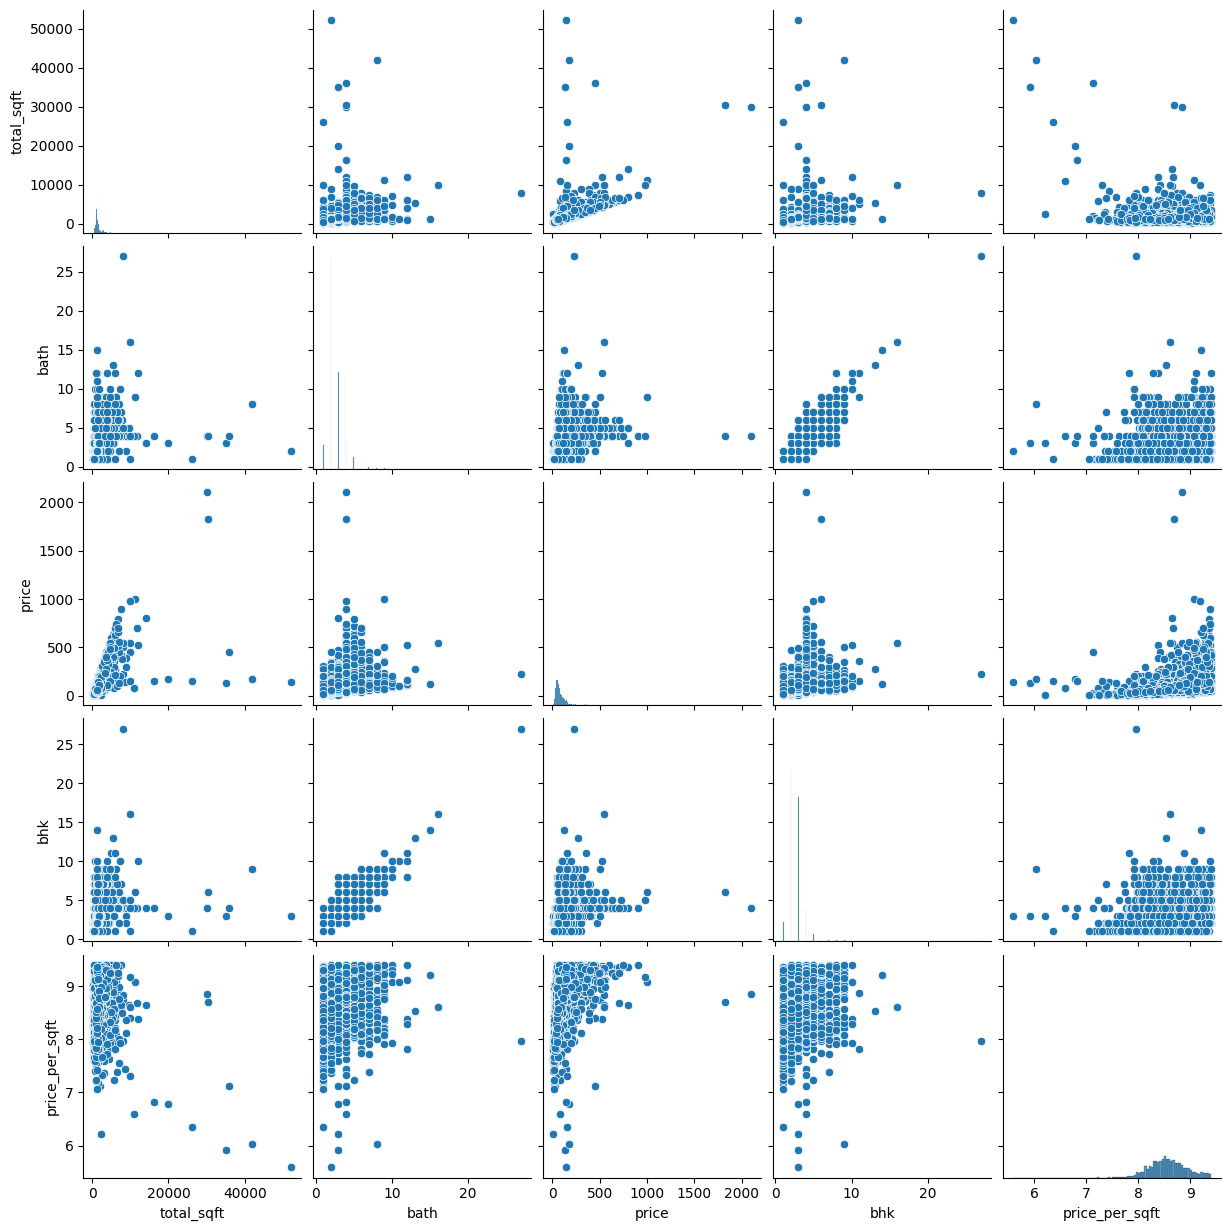

In [72]:
sns.pairplot(iqr_df.select_dtypes(include="number"))
plt.show()